# task10 数据分析实践 分析 CDNOW数据集 用户行为

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [70]:
#读数据
#用户id,购买日期，购买数据，购买金额
cols = ['uId','orderDate','orderProducts','orderMoney']
#读文件加列名names=[]
df = pd.read_table('./data/CDNOW_master.txt',names = cols, sep='\s+')#read_table读文本 \s+以不计数量空格区分
print("数据总量：\n",df.shape)
print("展示部分 前10条：\n",df.head(10))
print("展示部分 后10条：\n",df.tail(10))

数据总量：
 (69659, 4)
展示部分 前10条：
    uId  orderDate  orderProducts  orderMoney
0    1   19970101              1       11.77
1    2   19970112              1       12.00
2    2   19970112              5       77.00
3    3   19970102              2       20.76
4    3   19970330              2       20.76
5    3   19970402              2       19.54
6    3   19971115              5       57.45
7    3   19971125              4       20.96
8    3   19980528              1       16.99
9    4   19970101              2       29.33
展示部分 后10条：
          uId  orderDate  orderProducts  orderMoney
69649  23564   19971130              3       46.47
69650  23565   19970325              1       11.77
69651  23566   19970325              2       36.00
69652  23567   19970325              1       20.97
69653  23568   19970325              1       22.97
69654  23568   19970405              4       83.74
69655  23568   19970422              1       14.99
69656  23569   19970325              2       25.74
6965

G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


In [71]:
#时间转换pd.to_datetime(字符串，format='%Y%m%d') 把特定字符串转成日期格式
df['orderDate'] = pd.to_datetime(df.orderDate,format='%Y%m%d')
df.head()

,uId,orderDate,orderProducts,orderMoney
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [73]:
#把日期列字符串变日期格式 手写函数实现
'''
def formDate(dataStr):
    #dataStr = '19970422'
    dataStr = dataStr[:4]+'-'+dataStr[4:6]+'-'+dataStr[-2:]
    return dataStr#1997-04-22
#test = ['19970326','19970320','19800526']
#test = [19970326,19970320,19800526]
dateList =list(df['orderDate'].values)
#print(dateList)#[19970101, 19970112, 19970112, 19970102, 19970330
newDataList = [formDate(str(d)) for d in dateList]
#print(newDataList)#['1997-01-01', '1997-01-12', '1997-01-12', '1997-01-02',

'''

In [72]:
'''
#新列替换数据表
df['orderDate'] = newDataList
df.head()
'''

"\n#新列替换数据表\ndf['orderDate'] = newDataList\ndf.head()\n"

In [68]:
#统计看总体（包括最大值，平均值，标准差之类的）
df.describe()
#==由总本统计量可知：
#mean指标：用户平均购买2.4个商品，金额平均为34.8
#【std指标：标准差 衡量 平均值的分散程度（个体的离散程度），
#它大时表示大部分用户和平均值之差较大，小时表示大部分用户和平均值相差较小
#从数据看，2.333924 36.281942表示用户消费行为较均衡稳定有一致性，消费差别不大
#(改动了两处数据测试：
#00003 19971115  1000   20000 ， 00005 19970722  80000   150000
#std 马上变化明显：303.134137 574.355546)
#】
#【
#25% 25分位数指标：
#50%中位数指标：2个商品
#75% 75 分位数指标：3个商品
#分位数是连续分布的一组数中的点，表示是的位置（用来划分如人数多少），如中位数是数据的中间量，代表了中等水平，是一个”分水岭的角色“
#分位数和平均数对比：平均数在有极大极小数据时不能很好的代表一组总体，
#这时中位数的作用就出现了，***===它代表了数据的顺序，挑选一个中间位置的数量代表总体===***
#如：本例指购买商品量从低到高排，中间那个数量，
#从数据中看，***==购买量比如1,1,1,1,2,5,6,9,100 中位数2 
#意义为买2个是一个分水岭，买多和买少的人对半开==***
#75分位为3，则75%这个位置的人买了3个，前面75%少于3个，后面25%多于3个和中位数差不多，
#说明分布较平稳，大数分用户订单购买量都不多】
#max指标：单个用户在某天购买了最多商品数99个，金额最多1286
#min指标：单个用户最少购买数和金额
#（日期格式变字符串后不参与统计了，用户ID也不应参与统计，这里先不转暂不用管）
#==

,uId,orderProducts,orderMoney
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [69]:
#下面分析销费
#看是否符合二八定律：20%的客户贡献了80%的订单量或销量
df.info()#查看数据集情况，没有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
uId              69659 non-null int64
orderDate        69659 non-null object
orderProducts    69659 non-null int64
orderMoney       69659 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


In [76]:
#【==上面我们分析的是每笔订单，以下以用户为粒度分析，方法是以用户分组后再统计==】
#按用户id groupby分组 用户有多次销费
userDf = df.groupby('uId').sum()#分组求和
userDf.head()

,orderProducts,orderMoney
uId,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [78]:
userDf.describe()
#由统计结果可知，每个用户平均购买7个产品，最多买1033张，
#【用户平均消费106元，中位数43元，说明部分高消费用户拉高了平均消费额】

,orderProducts,orderMoney
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


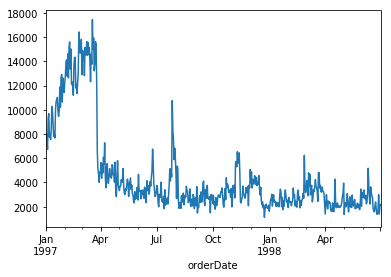

In [81]:
#画图看下按月分组的消费总额
df.groupby('orderDate').orderMoney.sum().plot()
#【分组后随后在组内做一个求和操作，sum()前加字段，是统计某个指标的求和】
#由图分析可知：1月消费较高，后面逐渐减弱下降，后面分析原因，看是否有离群点（异常点）

In [ ]:
#绘制每笔订单的散点图==》》==
